### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Getting the data

In [2]:
np.nan

nan

In [3]:
df = pd.read_csv('./DiamondsPrices2022.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### Finding no.of rows and columns

In [5]:
df.shape

(53943, 11)

#### There is no missing data

In [6]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

#### There are no Dupicate rows

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


###  outliers

<Axes: >

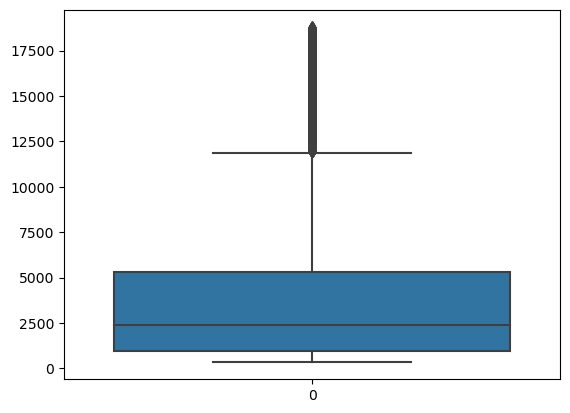

In [9]:
sns.boxplot(df["price"])

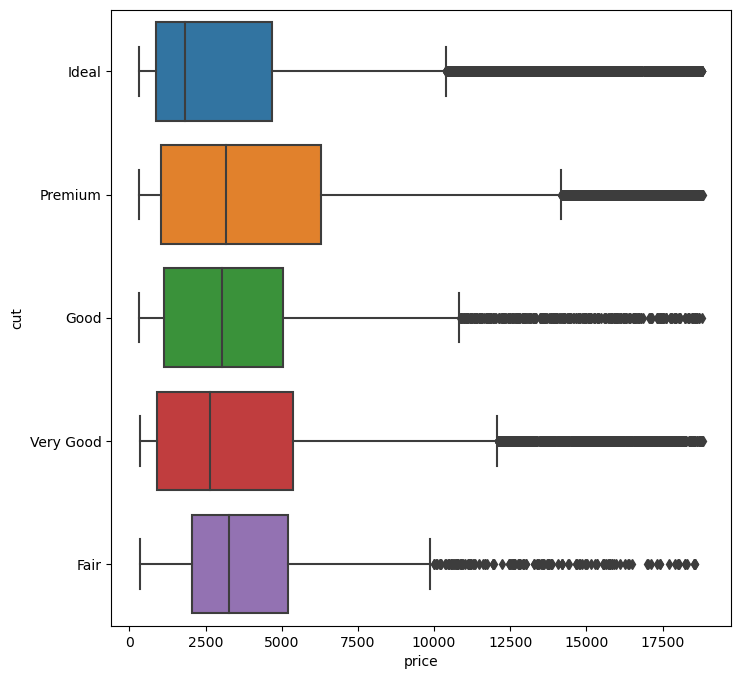

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="price",y="cut")
plt.show()

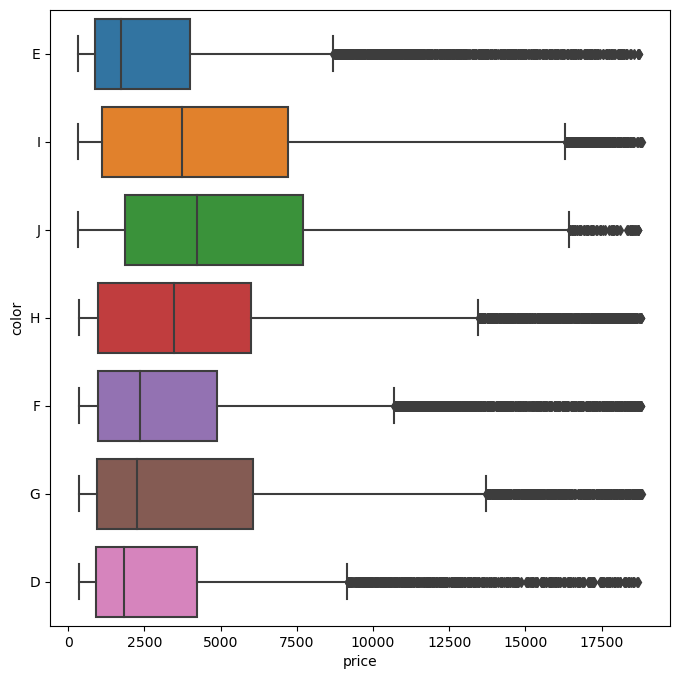

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="price",y="color")
plt.show()

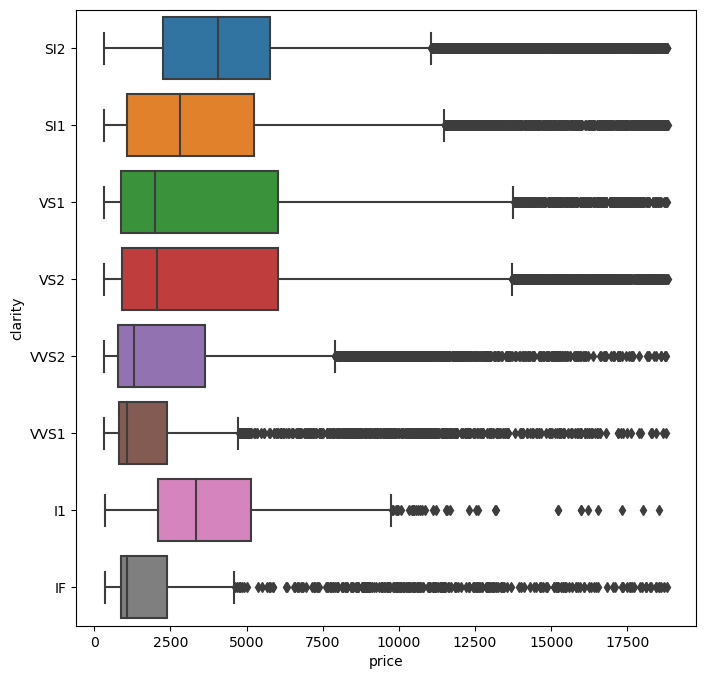

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="price",y="clarity")
plt.show()

### Handeling Categorical data

#### One hot encoding

In [13]:
df_cat = df.select_dtypes(object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [15]:
df_num = df.select_dtypes(["int64","float64"])

In [16]:
df_cat["cut"].value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [17]:
df_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [18]:
pd.get_dummies(df_cat["color"])

,D,E,F,G,H,I,J
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
53938,False,False,False,False,True,False,False
53939,True,False,False,False,False,False,False
53940,False,True,False,False,False,False,False
53941,False,False,True,False,False,False,False


#### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
le.fit_transform(df_cat["cut"])

array([2, 3, 1, ..., 3, 3, 4])

In [22]:
le.fit_transform(df_cat["clarity"])

array([3, 2, 4, ..., 2, 2, 5])

In [23]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [24]:
df_cat.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3


### Skewness

In [25]:
df_num.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [26]:
from scipy.stats import skew

Unnamed: 0
0.0


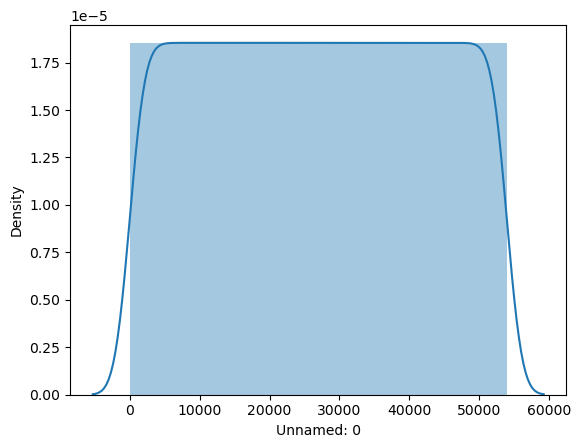

carat
1.1166741833807734


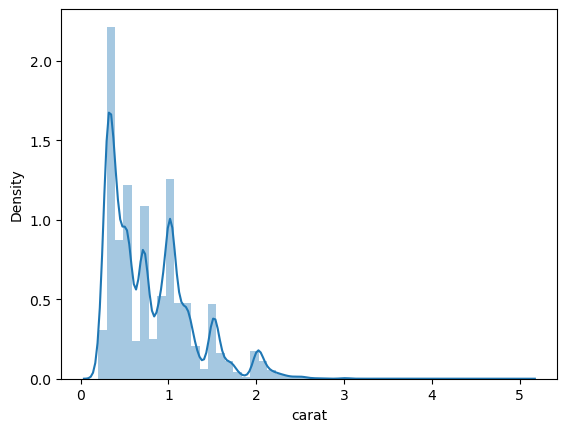

depth
-0.08218492883899588


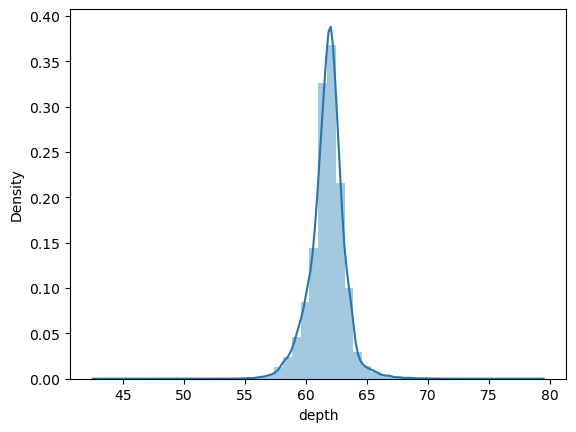

table
0.7968138196487125


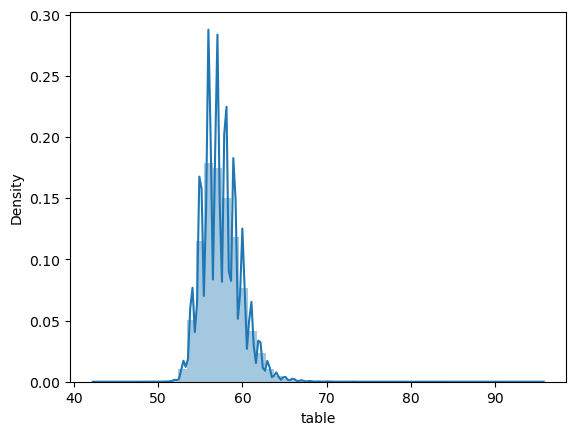

price
1.6184313166745192


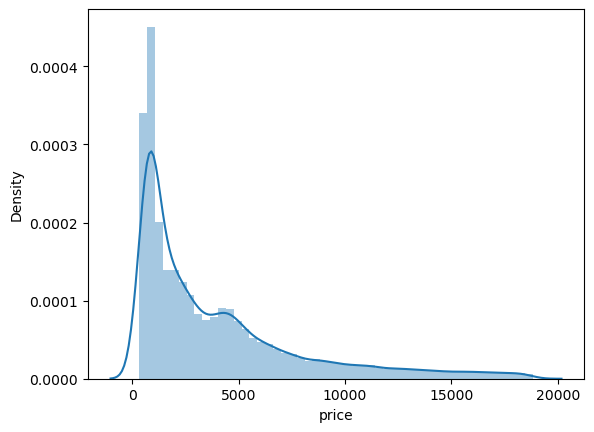

x
0.3786740044577951


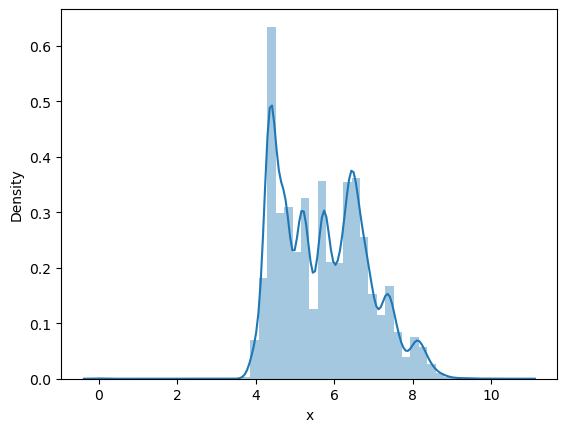

y
2.4341653904294347


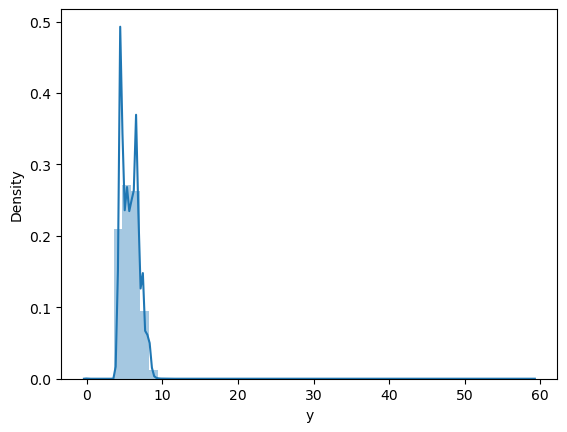

z
1.5224386843431503


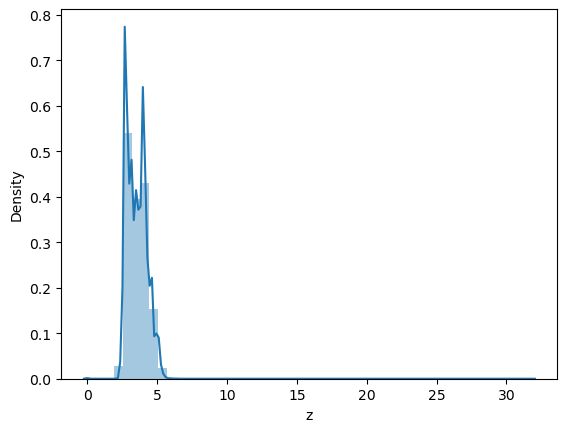

In [27]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

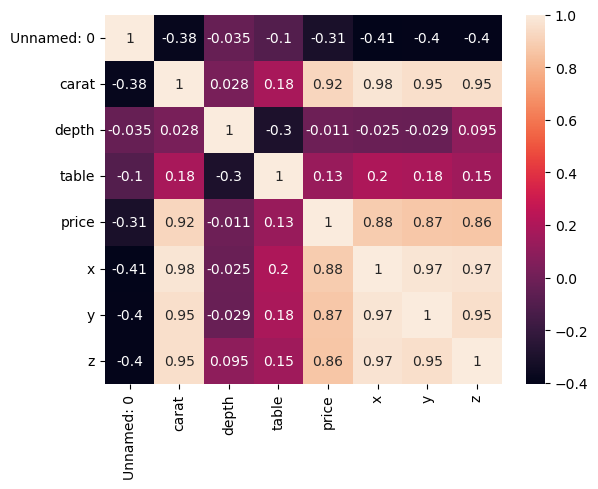

In [28]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [29]:
df_num["depth"] = np.sqrt(df_num["depth"])

In [30]:
skew(df_num["depth"])

-0.21979144097769143

In [31]:
df_num["carat"] = np.sqrt(df_num["carat"])

In [32]:
skew(df_num["carat"])

0.5484816248777937

In [33]:
np.log(-1)

nan

### Merging all the data back into single dataset 

In [34]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new["Price_in_rs"] = df_new["price"] * 82.88

In [35]:
df_new.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,color,clarity,Price_in_rs
0,1,0.479583,7.842194,55.0,326,3.95,3.98,2.43,2,1,3,27018.88
1,2,0.458258,7.733046,61.0,326,3.89,3.84,2.31,3,1,2,27018.88
2,3,0.479583,7.543209,65.0,327,4.05,4.07,2.31,1,1,4,27101.76
3,4,0.538516,7.899367,58.0,334,4.20,4.23,2.63,3,5,5,27681.92
4,5,0.556776,7.956130,58.0,335,4.34,4.35,2.75,1,6,3,27764.80


### Scaling Data

####  MinMaxScaler

In [36]:
#from sklearn.preprocessing import MinMaxScaler

In [37]:
#for col in df_new:
    #mx = MinMaxScaler()
    #df_new[col] = mx.fit_transform(df_new[[col]])

In [38]:
#df_new.head()

#### Standard Scaler

<p> Standardization </p>
z = (x-mean) / standard deviation

In [39]:
#from sklearn.preprocessing import StandardScaler

In [40]:
#for col in df_new:
    #ss = StandardScaler()
    #df_new[col] = ss.fit_transform(df_new[[col]])

In [41]:
#df_new.head()

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor

In [44]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming df_new contains your dataset with features and target (Price_in_rs)

# Splitting the dataset into features (X) and target variable (y)
X = df_new[['carat', 'depth', 'table', 'clarity', 'color', 'cut']]
y = df_new['Price_in_rs']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('diamond_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Now you have saved your model in a pickle file named 'diamond_price_model.pkl'

# Load the model from the pickle file
with open('diamond_price_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
new_data = df_new[['carat', 'depth', 'table', 'clarity', 'color', 'cut']].tail(1)
prediction = loaded_model.predict(new_data)
print("The model predicts the price for the last row:", prediction[0])
print("Actual value is:", df_new['Price_in_rs'].iloc[-1])  # Fetching the actual value from the dataframe


The model predicts the price for the last row: 229185.57760000002
Actual value is: 228500.15999999997
